## Getting the data

In [64]:
import os
import numpy as np
import pandas as pd
from ucimlrepo import fetch_ucirepo
import seaborn as sbn
import matplotlib.pyplot as plt
from sklearn.preprocessing import power_transform
from sklearn.preprocessing import FunctionTransformer

import yaml

In [2]:
# fetch dataset 
online_news_popularity = fetch_ucirepo(id=332) 

In [3]:
# data (as pandas dataframes) 
X = online_news_popularity.data.features 
y = online_news_popularity.data.targets 


In [4]:
X.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,...,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500
1,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,...,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000
2,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,...,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000
3,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,...,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000
4,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,...,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364


In [5]:
# metadata 
print(online_news_popularity.metadata)

{'uci_id': 332, 'name': 'Online News Popularity', 'repository_url': 'https://archive.ics.uci.edu/dataset/332/online+news+popularity', 'data_url': 'https://archive.ics.uci.edu/static/public/332/data.csv', 'abstract': 'This dataset summarizes a heterogeneous set of features about articles published by Mashable in a period of two years. The goal is to predict the number of shares in social networks (popularity).', 'area': 'Business', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 39797, 'num_features': 58, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': [' shares'], 'index_col': ['url'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2015, 'last_updated': 'Thu Feb 15 2024', 'dataset_doi': '10.24432/C5NS3V', 'creators': ['Kelwin Fernandes', 'Pedro Vinagre', 'Paulo Cortez', 'Pedro Sernadela'], 'intro_paper': {'ID': 390, 'type': 'NATIVE', 'title': 'A Proactive Intelligent Decisio

In [6]:
# variable information 
online_news_popularity.variables

,name,role,type,demographic,description,units,missing_values
0,url,ID,Categorical,None,None,None,no
1,timedelta,Other,Continuous,None,None,None,no
2,n_tokens_title,Feature,Continuous,None,None,None,no
3,n_tokens_content,Feature,Continuous,None,None,None,no
4,n_unique_tokens,Feature,Continuous,None,None,None,no
...,...,...,...,...,...,...,...
56,title_subjectivity,Feature,Continuous,None,None,None,no
57,title_sentiment_polarity,Feature,Continuous,None,None,None,no
58,abs_title_subjectivity,Feature,Continuous,None,None,None,no
59,abs_title_sentiment_polarity,Feature,Continuous,None,None,None,no


In [7]:
# Concatenamos ambos datasets (feature y target)
online_news_popularity = pd.concat([X, y], axis = 1)
online_news_popularity.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [8]:
# Generamos la ruta en donde se almacenará
directory = r'./../data/raw'
file_path = os.path.join(directory, 'online_news_popularity.csv')

os.makedirs(directory, exist_ok=True)

In [9]:
#  Guardamos el dataset completo
online_news_popularity.to_csv(file_path, index=False)

## Descriptive Statistics

In [10]:
path = r'./../data/raw/online_news_popularity.csv'
online_news_popularity_df = pd.read_csv(path, delimiter=',')

In [11]:
online_news_popularity_df.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [20]:
online_news_popularity_df.shape #39,644 records

(39644, 59)

In [12]:
online_news_popularity_df.tail()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
39639,11.0,346.0,0.529052,1.0,0.684783,9.0,7.0,1.0,1.0,4.523121,...,0.100000,0.75,-0.260000,-0.5,-0.125000,0.100000,0.000000,0.400000,0.000000,1800
39640,12.0,328.0,0.696296,1.0,0.885057,9.0,7.0,3.0,48.0,4.405488,...,0.136364,0.70,-0.211111,-0.4,-0.100000,0.300000,1.000000,0.200000,1.000000,1900
39641,10.0,442.0,0.516355,1.0,0.644128,24.0,1.0,12.0,1.0,5.076923,...,0.136364,0.50,-0.356439,-0.8,-0.166667,0.454545,0.136364,0.045455,0.136364,1900
39642,6.0,682.0,0.539493,1.0,0.692661,10.0,1.0,1.0,0.0,4.975073,...,0.062500,0.50,-0.205246,-0.5,-0.012500,0.000000,0.000000,0.500000,0.000000,1100
39643,10.0,157.0,0.701987,1.0,0.846154,1.0,1.0,0.0,2.0,4.471338,...,0.100000,0.50,-0.200000,-0.2,-0.200000,0.333333,0.250000,0.166667,0.250000,1300


In [13]:
online_news_popularity_df.info() #Checking for nulls or missing data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 59 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0    n_tokens_title                 39644 non-null  float64
 1    n_tokens_content               39644 non-null  float64
 2    n_unique_tokens                39644 non-null  float64
 3    n_non_stop_words               39644 non-null  float64
 4    n_non_stop_unique_tokens       39644 non-null  float64
 5    num_hrefs                      39644 non-null  float64
 6    num_self_hrefs                 39644 non-null  float64
 7    num_imgs                       39644 non-null  float64
 8    num_videos                     39644 non-null  float64
 9    average_token_length           39644 non-null  float64
 10   num_keywords                   39644 non-null  float64
 11   data_channel_is_lifestyle      39644 non-null  float64
 12   data_channel_is_entertainment  

In [14]:
online_news_popularity_df.describe()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,4.548239,...,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,0.844406,...,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,4.478404,...,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,4.664082,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,4.854839,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,8.041534,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


In [15]:
#We can see there are a few records with namespacing between the column name, so we need to make a trim
columns_clean = [i.strip() for i in online_news_popularity_df.columns.values.tolist()]
online_news_popularity_df.columns = columns_clean

In [16]:
online_news_popularity_df['shares'].values

array([ 593,  711, 1500, ..., 1900, 1100, 1300], dtype=int64)

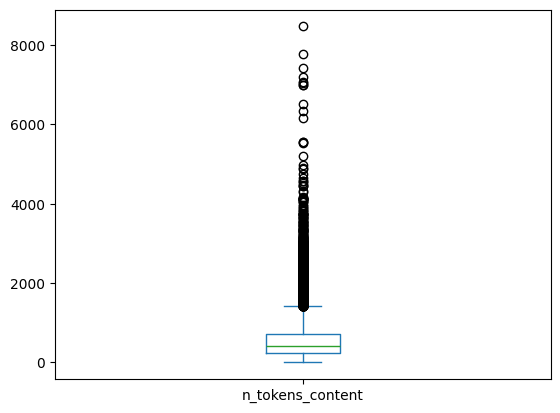

In [17]:
online_news_popularity_df["n_tokens_content"].plot(kind = "box")
plt.show()

In [18]:
online_news_popularity_df.mean(axis=0)

n_tokens_title                       10.398749
n_tokens_content                    546.514731
n_unique_tokens                       0.548216
n_non_stop_words                      0.996469
n_non_stop_unique_tokens              0.689175
num_hrefs                            10.883690
num_self_hrefs                        3.293638
num_imgs                              4.544143
num_videos                            1.249874
average_token_length                  4.548239
num_keywords                          7.223767
data_channel_is_lifestyle             0.052946
data_channel_is_entertainment         0.178009
data_channel_is_bus                   0.157855
data_channel_is_socmed                0.058597
data_channel_is_tech                  0.185299
data_channel_is_world                 0.212567
kw_min_min                           26.106801
kw_max_min                         1153.951682
kw_avg_min                          312.366967
kw_min_max                        13612.354102
kw_max_max   

In [19]:
online_news_popularity_df.dtypes #All numerical fields, no objects nor booleans

n_tokens_title                   float64
n_tokens_content                 float64
n_unique_tokens                  float64
n_non_stop_words                 float64
n_non_stop_unique_tokens         float64
num_hrefs                        float64
num_self_hrefs                   float64
num_imgs                         float64
num_videos                       float64
average_token_length             float64
num_keywords                     float64
data_channel_is_lifestyle        float64
data_channel_is_entertainment    float64
data_channel_is_bus              float64
data_channel_is_socmed           float64
data_channel_is_tech             float64
data_channel_is_world            float64
kw_min_min                       float64
kw_max_min                       float64
kw_avg_min                       float64
kw_min_max                       float64
kw_max_max                       float64
kw_avg_max                       float64
kw_min_avg                       float64
kw_max_avg      

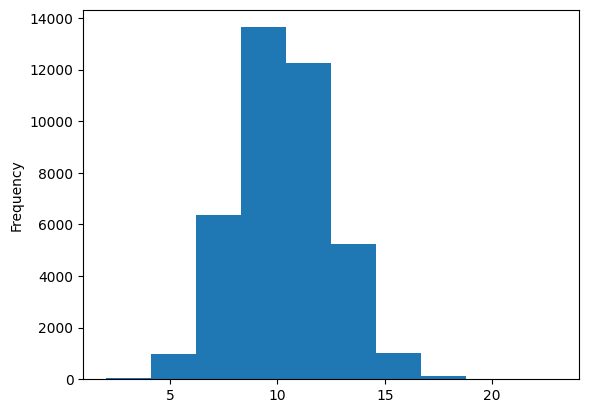

In [23]:
online_news_popularity_df['n_tokens_title'].plot(kind = "hist")
plt.show()

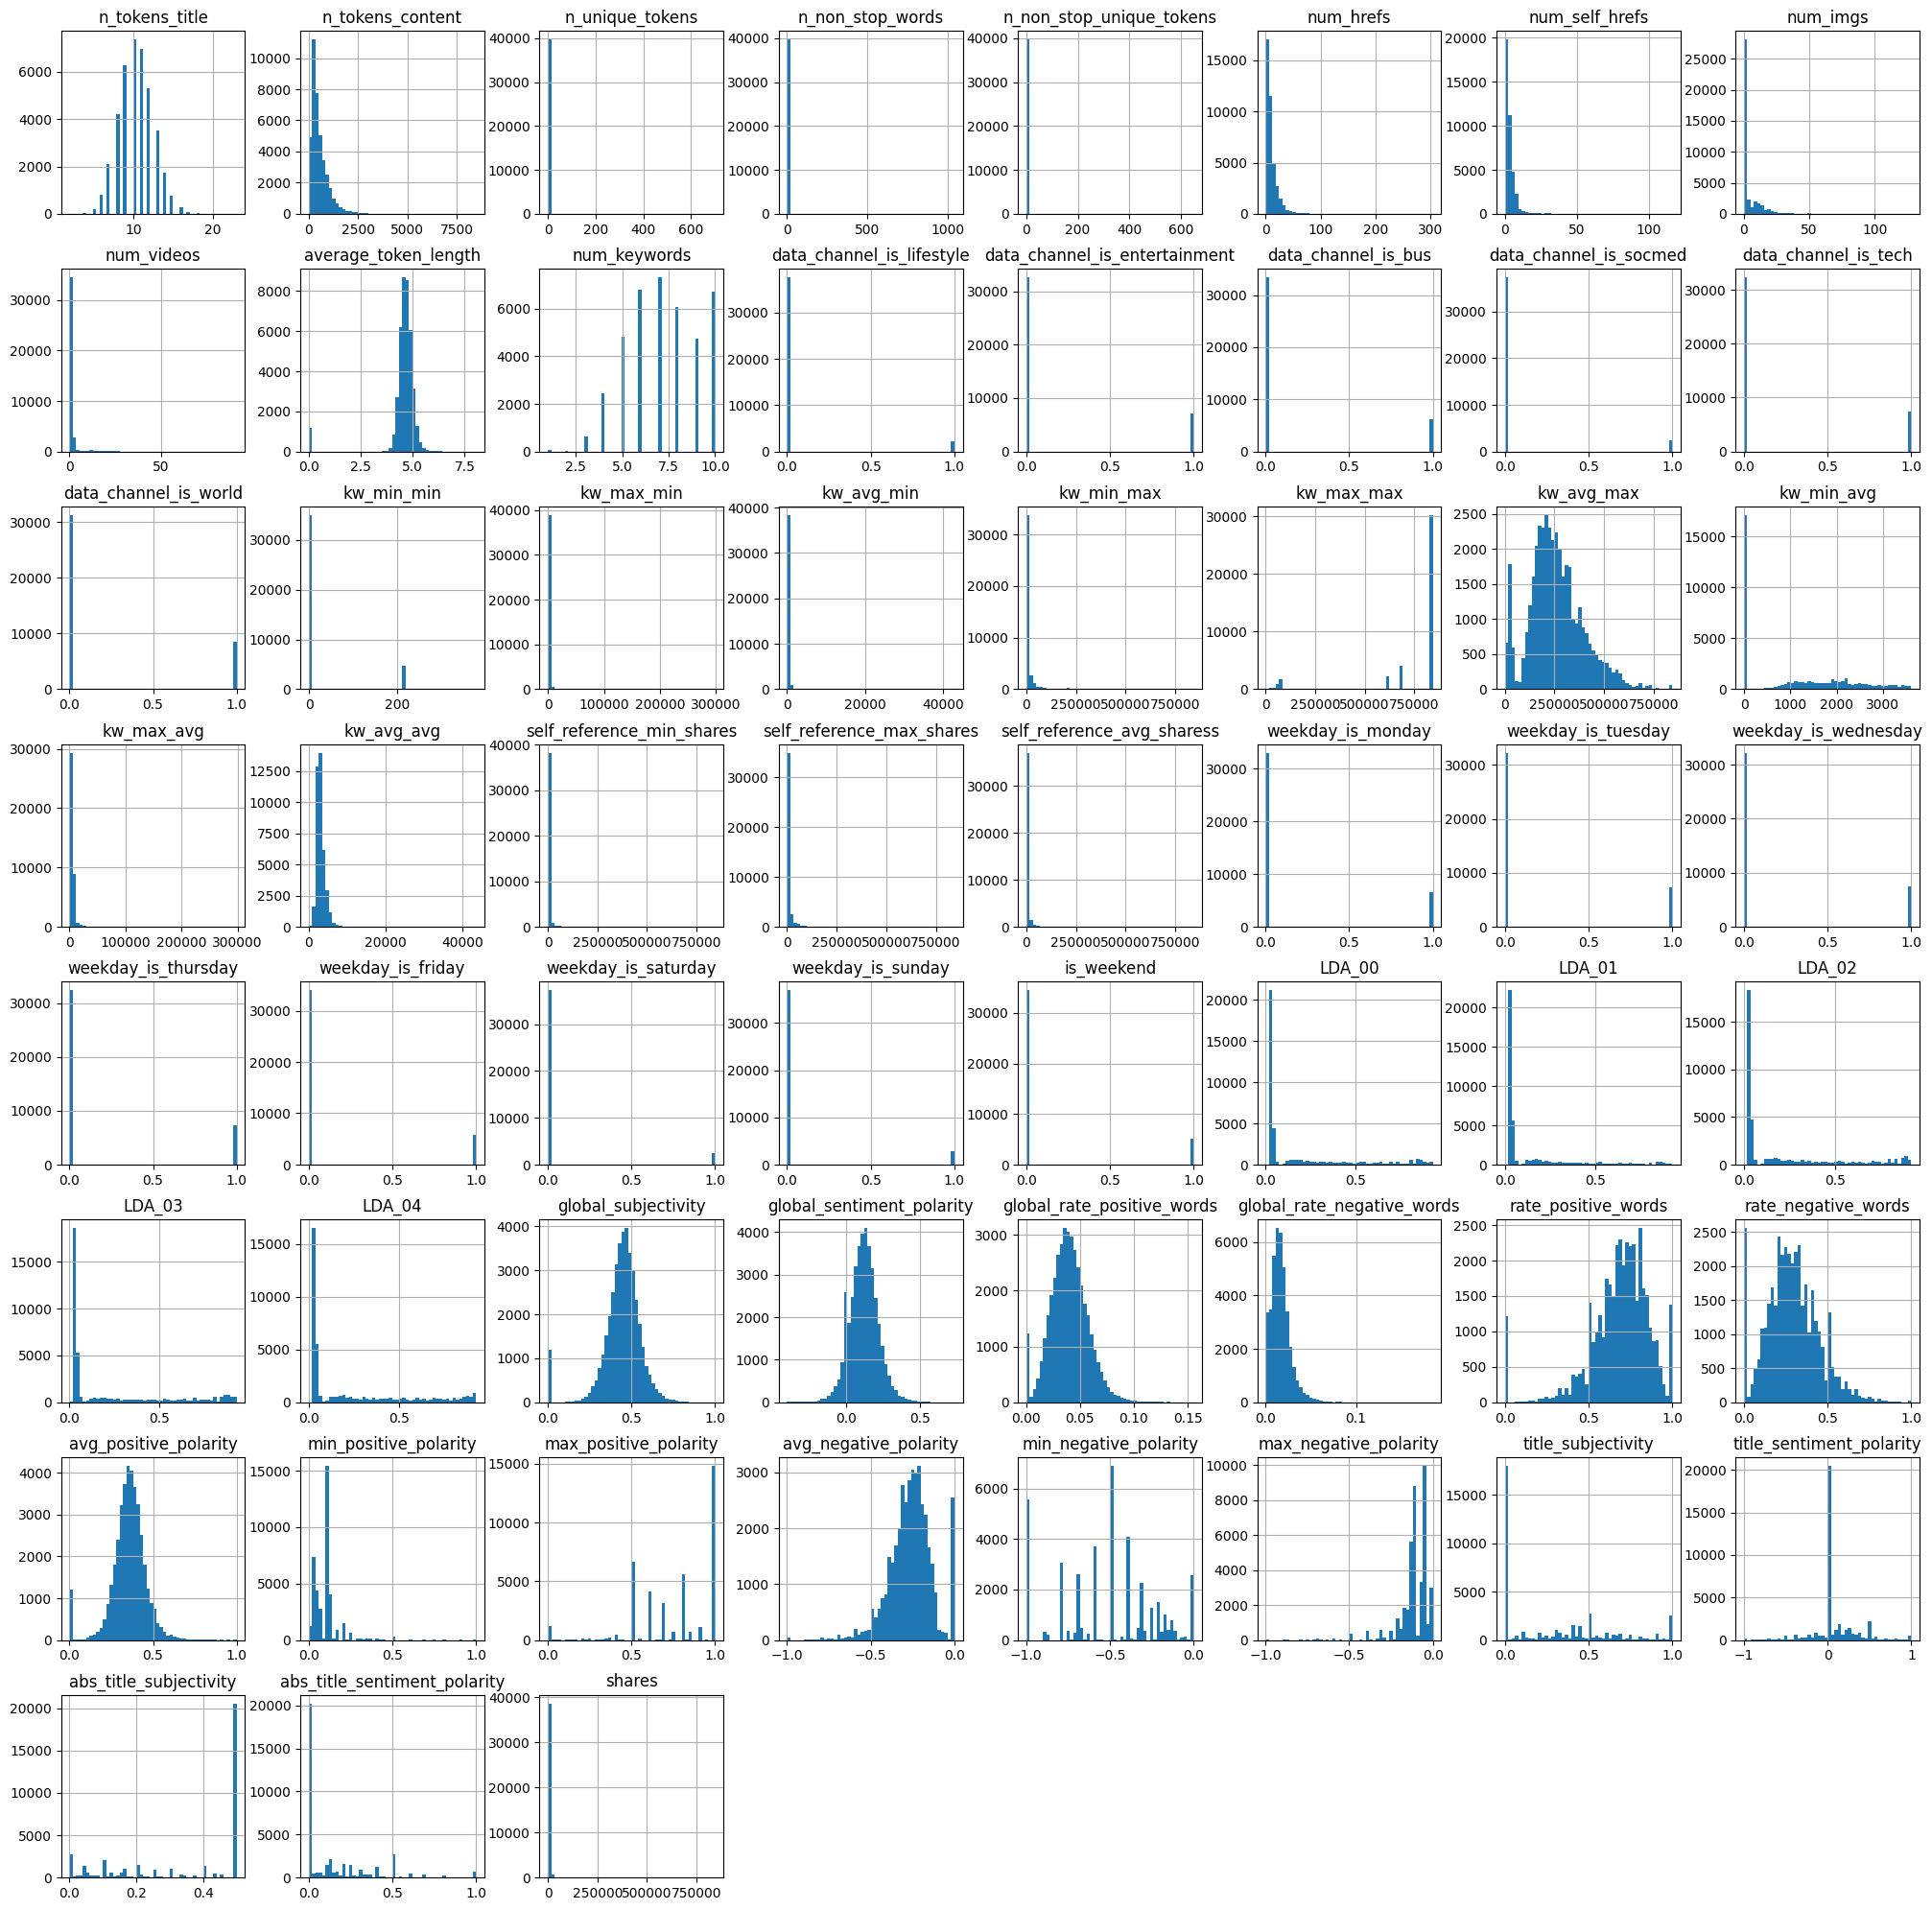

In [26]:
online_news_popularity_df.hist(bins=50,figsize=(25,25))
plt.show()

### A couple of comments: Different scales, some features do not have the necessary values to see generate a histogram , for example week_is_monday altough is a numeric value, is a binary feature , but others like num_keywords have few categories, so the histogram is not possible to see a well-generated curve

* For a first model, we'll take into account the following numerical features:
    * n_tokens_content
    * num_hrefs
    * average_token_length
    * kw_avg_max
    * global_subjectivity , global_sentiment_polarity , global_rate_positive_words , global_rate_negative_words
    * rate_positive_words , rate_negative_words
    * avg_positive_polarity , avg_negative_polarity
* Binary features:
    * data_channel_is_lifestyle, data_channel_is_entertainment, data_channel_is_bus, data_channel_is_socmed 
    * data_channel_is_tech, data_channel_is_world , weekday_is_monday, weekday_is_tuesday, weekday_is_wednesday
    * weekday_is_thursday, weekday_is_friday, weekday_is_saturday, weekday_is_sunday

In [28]:
online_news_popularity_df.skew()

n_tokens_title                     0.165320
n_tokens_content                   2.945422
n_unique_tokens                  198.655116
n_non_stop_words                 198.792445
n_non_stop_unique_tokens         198.443294
num_hrefs                          4.013495
num_self_hrefs                     5.172751
num_imgs                           3.946596
num_videos                         7.019533
average_token_length              -4.576012
num_keywords                      -0.147251
data_channel_is_lifestyle          3.993019
data_channel_is_entertainment      1.683585
data_channel_is_bus                1.876870
data_channel_is_socmed             3.758880
data_channel_is_tech               1.619976
data_channel_is_world              1.405169
kw_min_min                         2.374947
kw_max_min                        35.328434
kw_avg_min                        31.306108
kw_min_max                        10.386372
kw_max_max                        -2.644982
kw_avg_max                      

In [30]:
online_news_popularity_df.kurtosis()

n_tokens_title                      -0.000750
n_tokens_content                    19.478412
n_unique_tokens                  39523.832001
n_non_stop_words                 39560.294950
n_non_stop_unique_tokens         39467.693708
num_hrefs                           35.506333
num_self_hrefs                      56.171456
num_imgs                            24.525746
num_videos                          74.075414
average_token_length                22.180450
num_keywords                        -0.805897
data_channel_is_lifestyle           13.944905
data_channel_is_entertainment        0.834500
data_channel_is_bus                  1.522719
data_channel_is_socmed              12.129788
data_channel_is_tech                 0.624353
data_channel_is_world               -0.025500
kw_min_min                           3.660003
kw_max_min                        2100.070758
kw_avg_min                        1592.244353
kw_min_max                         123.432109
kw_max_max                        

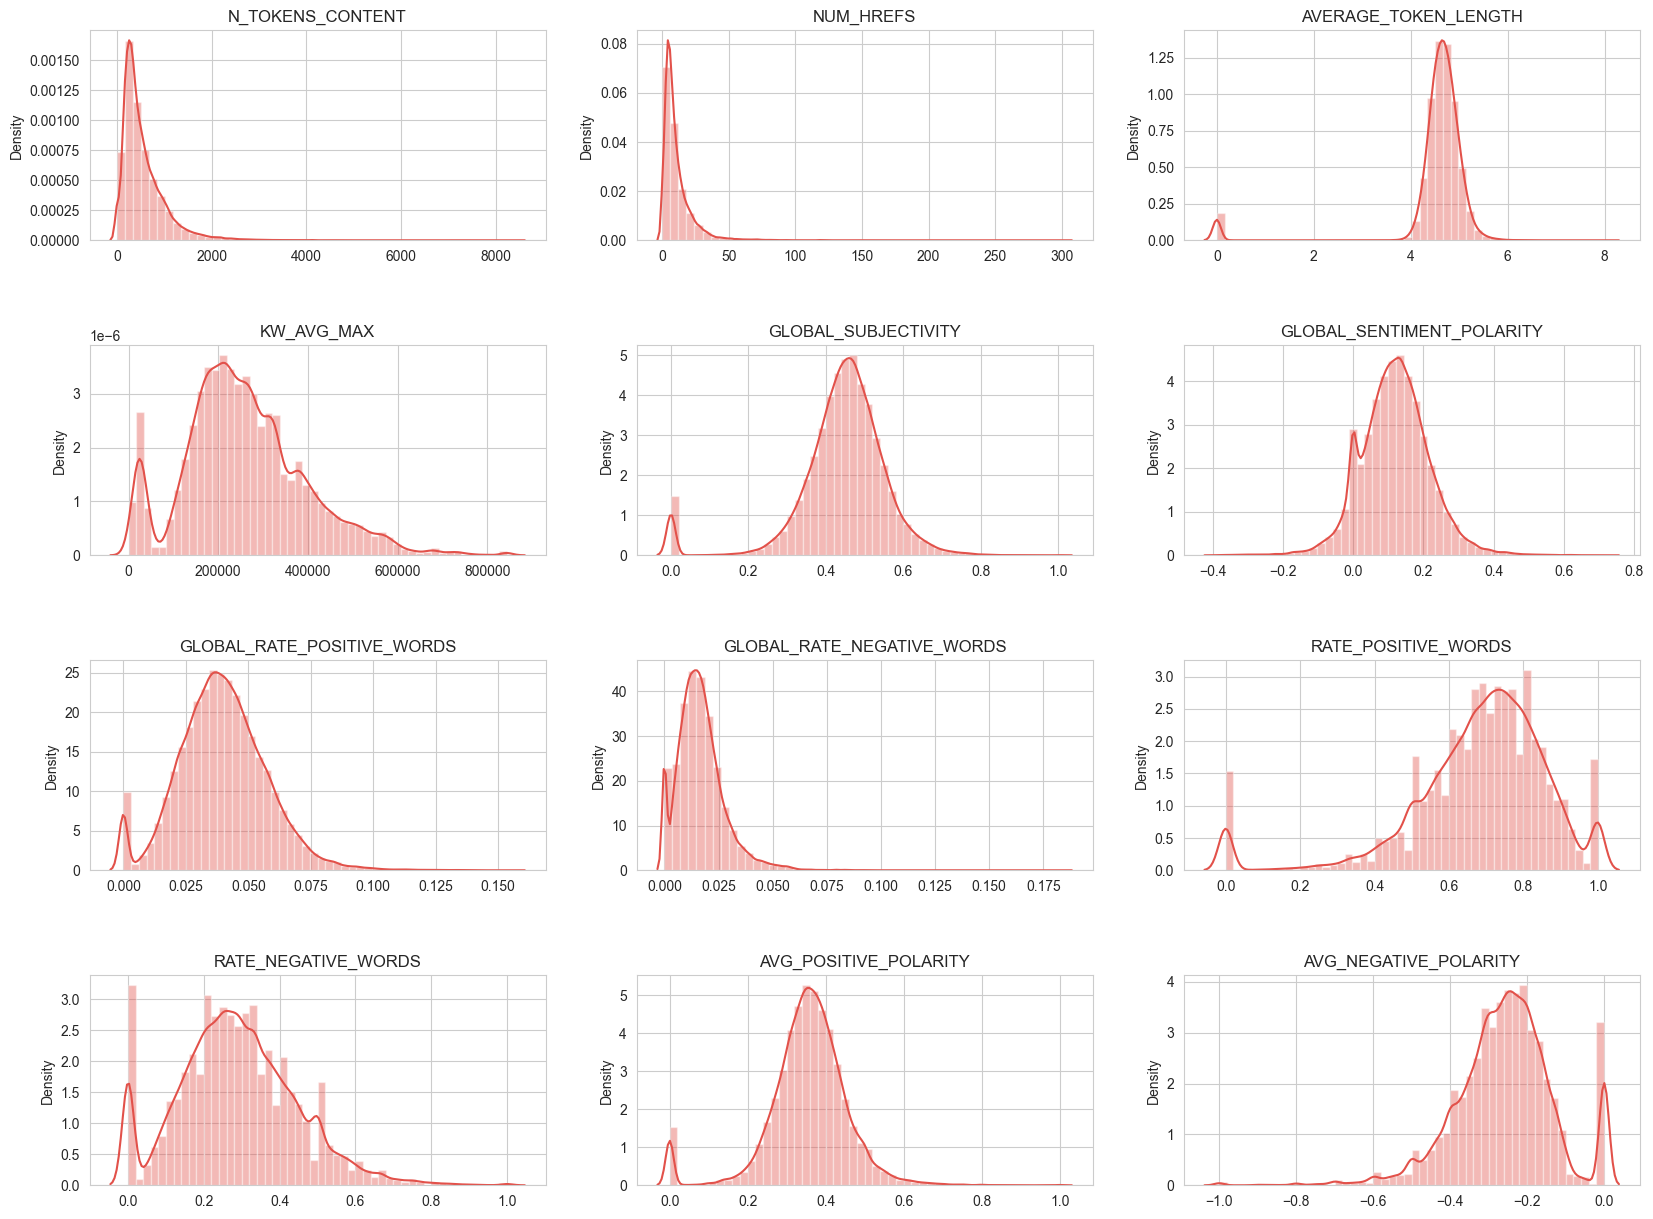

In [47]:
#Removed warning for the task's sake
import warnings
warnings.filterwarnings("ignore")

sbn.set_style("whitegrid")
sbn.set_palette("Spectral")

# Define subplot grid
cols_names_numeric = "n_tokens_content,num_hrefs,average_token_length,kw_avg_max,\
global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,\
rate_positive_words,rate_negative_words,avg_positive_polarity,avg_negative_polarity".split(',')

fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(20, 15))
plt.subplots_adjust(hspace=0.5)

# loop through columns and axes
for variable, ax in zip(cols_names_numeric, axs.ravel()):
    # filter df for column and plot on specified axes
    sbn.distplot(online_news_popularity_df[variable], ax=ax,kde_kws={'bw': 0.1})
    # chart formatting
    ax.set_title(variable.upper())
    ax.set_xlabel("")

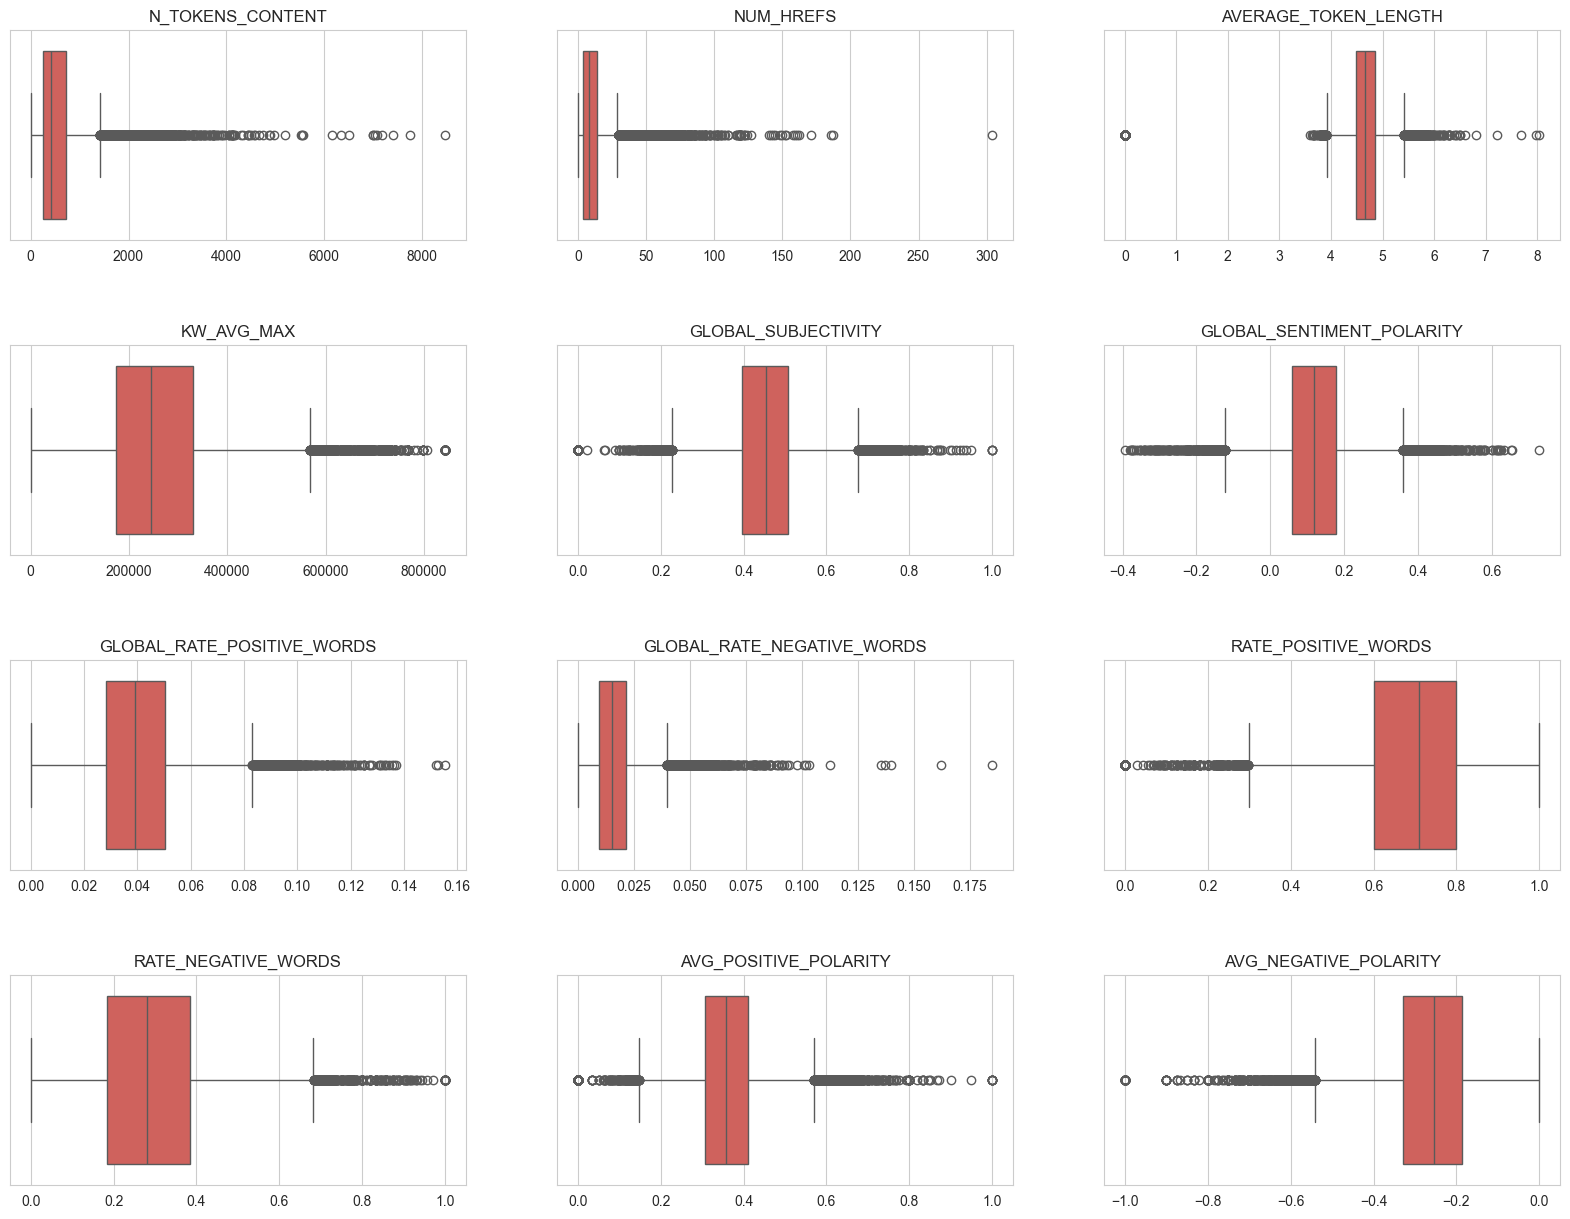

In [49]:
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(20, 15))
plt.subplots_adjust(hspace=0.5)

for variable, ax in zip(cols_names_numeric, axs.ravel()):
    sbn.boxplot(x=variable,data=online_news_popularity_df,ax=ax)
    ax.set_title(variable.upper())
    ax.set_xlabel("")
plt.show()

### Some transformations in order to make the skew different and distribution to have a centered curve


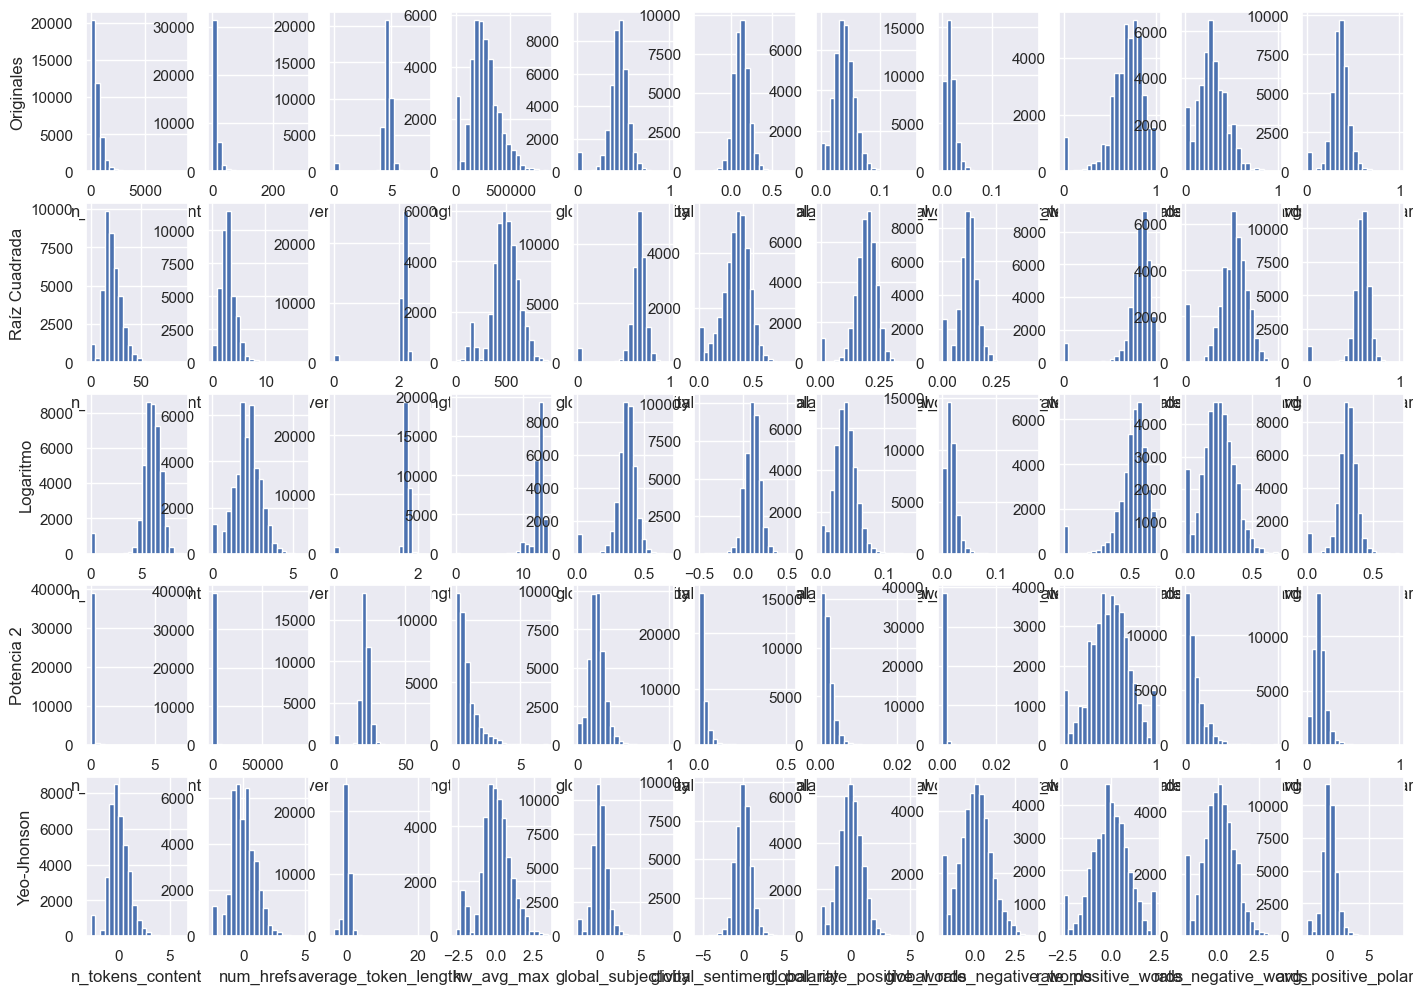

In [78]:
variables_a_transformar = cols_names_numeric[:11]
n = len(variables_a_transformar)
misdatos = online_news_popularity_df

sbn.set(rc={'figure.figsize':(17,12)})
fig, axes = plt.subplots(5, n)    
for k in range(0,n):       
    # Datos originales ---------------------------------------------------------
    plt.subplot(5,n,k+1+(n*0)) 

    Transf0 = misdatos[variables_a_transformar[k]]  #  En esta línea se debe asignar a Transf0 los valores de cada variable "k" sin transformar.
    plt.hist(Transf0,bins=20)  #  En este línea agrega el comando para obtener el histograma de Transf0 con 20 barras (bins).
    plt.xlabel(variables_a_transformar[k])
    if k==0:
      plt.ylabel('Originales')

    # Datos transformados con raíz cuadrada ------------------------------------
    plt.subplot(5,n,k+1+(n*1))    

    Transf1 = np.sqrt(misdatos[variables_a_transformar[k]])          #  En esta línea se debe aplicar la raíz cuadrada a los valores de cada variable "k" sin transformar.
    plt.hist(Transf1,bins=20)                    #  En este línea agrega el comando para obtener el histograma de Transf1 con 20 barras (bins).
    plt.xlabel(variables_a_transformar[k])
    if k==0:
      plt.ylabel('Raíz Cuadrada')

    # Datos transformados con logaritmo natural --------------------------------
    plt.subplot(5,n,k+1+(n*2))     

    Transf2 = np.log1p(misdatos[variables_a_transformar[k]])         #  En esta línea se debe aplicar el logaritmo natural a los valores de cada variable "k" sin transformar.
    plt.hist(Transf2,bins=20)                    #  En este línea agrega el comando para obtener el histograma de Transf2 con 20 barras (bins).
    plt.xlabel(variables_a_transformar[k])
    if k==0:
      plt.ylabel('Logaritmo')

    # Datos transformados con la potencia de 2 ---------------------------------
    plt.subplot(5,n,k+1+(n*3))

    Transf3 = np.power(misdatos[variables_a_transformar[k]],2)          #  En esta línea debes elevar al cuadrado los valores de cada variable "k" sin transformar.
    plt.hist(Transf3,bins=20)                    #  En este línea agrega el comando para obtener el histograma de Transf3 con 20 barras (bins).
    plt.xlabel(variables_a_transformar[k])
    if k==0:
      plt.ylabel('Potencia 2')
    
    # Datos transformados con Box-Cox ------------------------------------------
    plt.subplot(5,n,k+1+(n*4))

    Transf4 = power_transform(misdatos[variables_a_transformar[k]].values.reshape(-1,1), method='yeo-johnson')       #  En esta línea se debe aplicar la transformación Box-Cox a los valores de cada variable "k" sin transformar.
    plt.hist(Transf4,bins=20)                    #  En este línea agrega el comando para obtener el histograma de Transf4 con 20 barras (bins).
    plt.xlabel(variables_a_transformar[k])
    if k==0:
      plt.ylabel('Yeo-Jhonson')
plt.show()

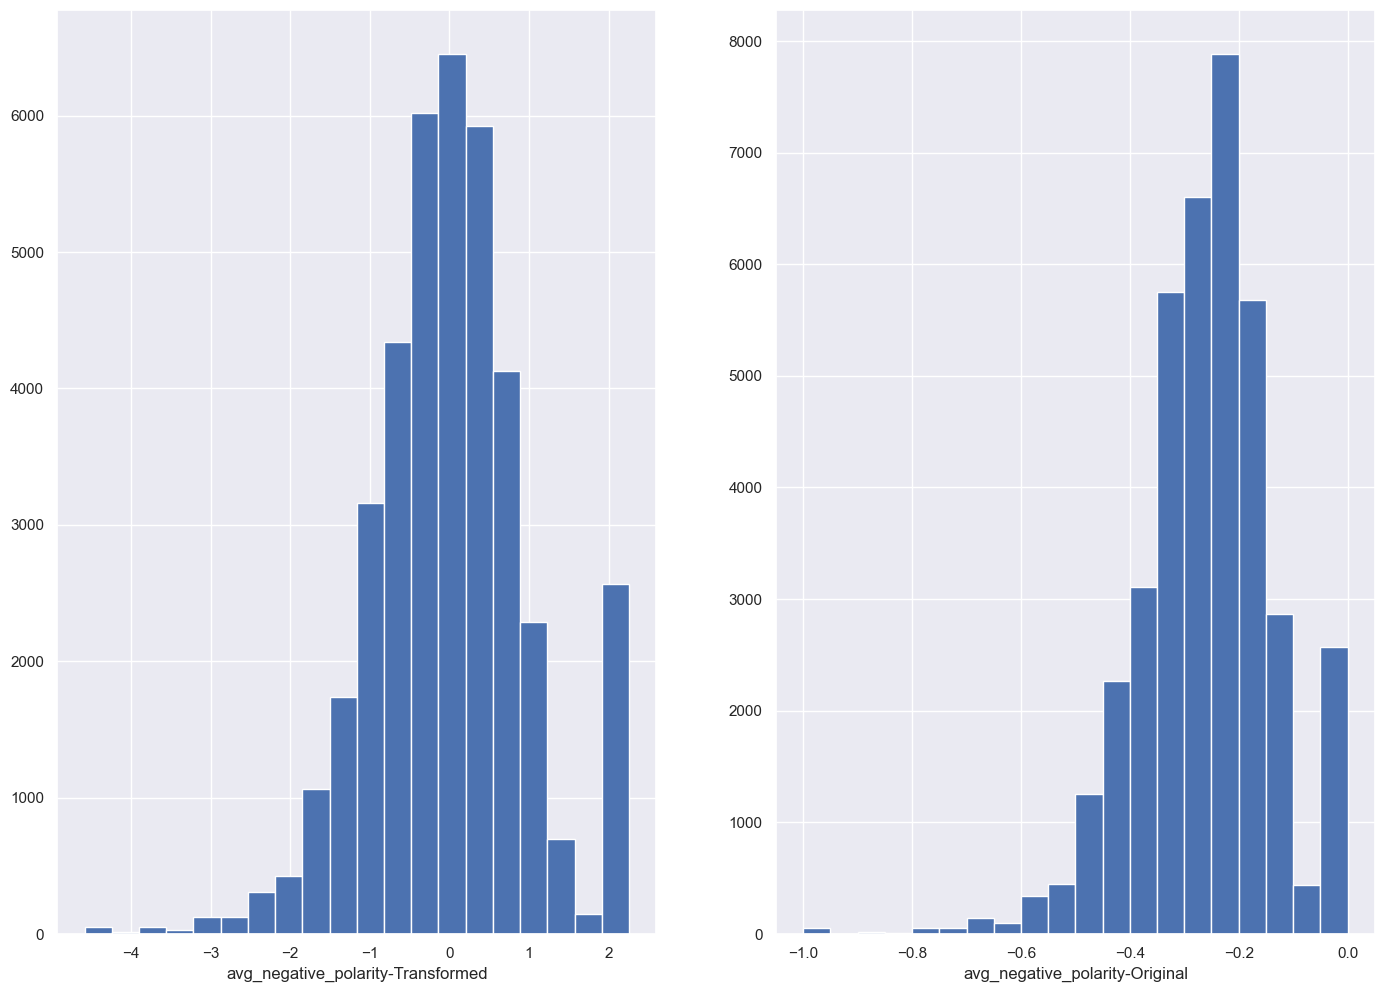

In [82]:
#As the last column named avg_negative_polarity has a lot of negative values, if we apply operations such as square root, or log2 
#We will get error, so the only option we have is to apply Yeo-Johnson, let's check if that can help


fig, axes = plt.subplots(1, 2)    

plt.subplot(1,2,1)
trans = power_transform(misdatos['avg_negative_polarity'].values.reshape(-1,1), method='yeo-johnson') 
plt.hist(trans,bins=20)                  
plt.xlabel('avg_negative_polarity-Transformed')

plt.subplot(1,2,2)
plt.hist(misdatos['avg_negative_polarity'],bins=20)                  
plt.xlabel('avg_negative_polarity-Original')
plt.show()

Puntos a destacar, podemos aplicar las siguientes transformaciones a las siguientes variables para corregir skew:
   * Númericas - Standard Scaler para que todos los rangos esten entre 0 y 1 
       * n_tokens_content - Logaritmo - np.log1p
       * num_hrefs - Logaritmo 
       * average_token_length - Original
       * kw_avg_max - Raiz Cuadrada
       * global_subjectivity - Logaritmo 
       * global_sentiment_polarity - Original
       * global_rate_positive_words - Raiz Cuadrada
       * global_rate_negative_words - Yeo Johnson
       * rate_positive_words -Yeo Jhonson
       * rate_negative_words - Yeo Jhonson
       * avg_positive_polarity - Logaritmo

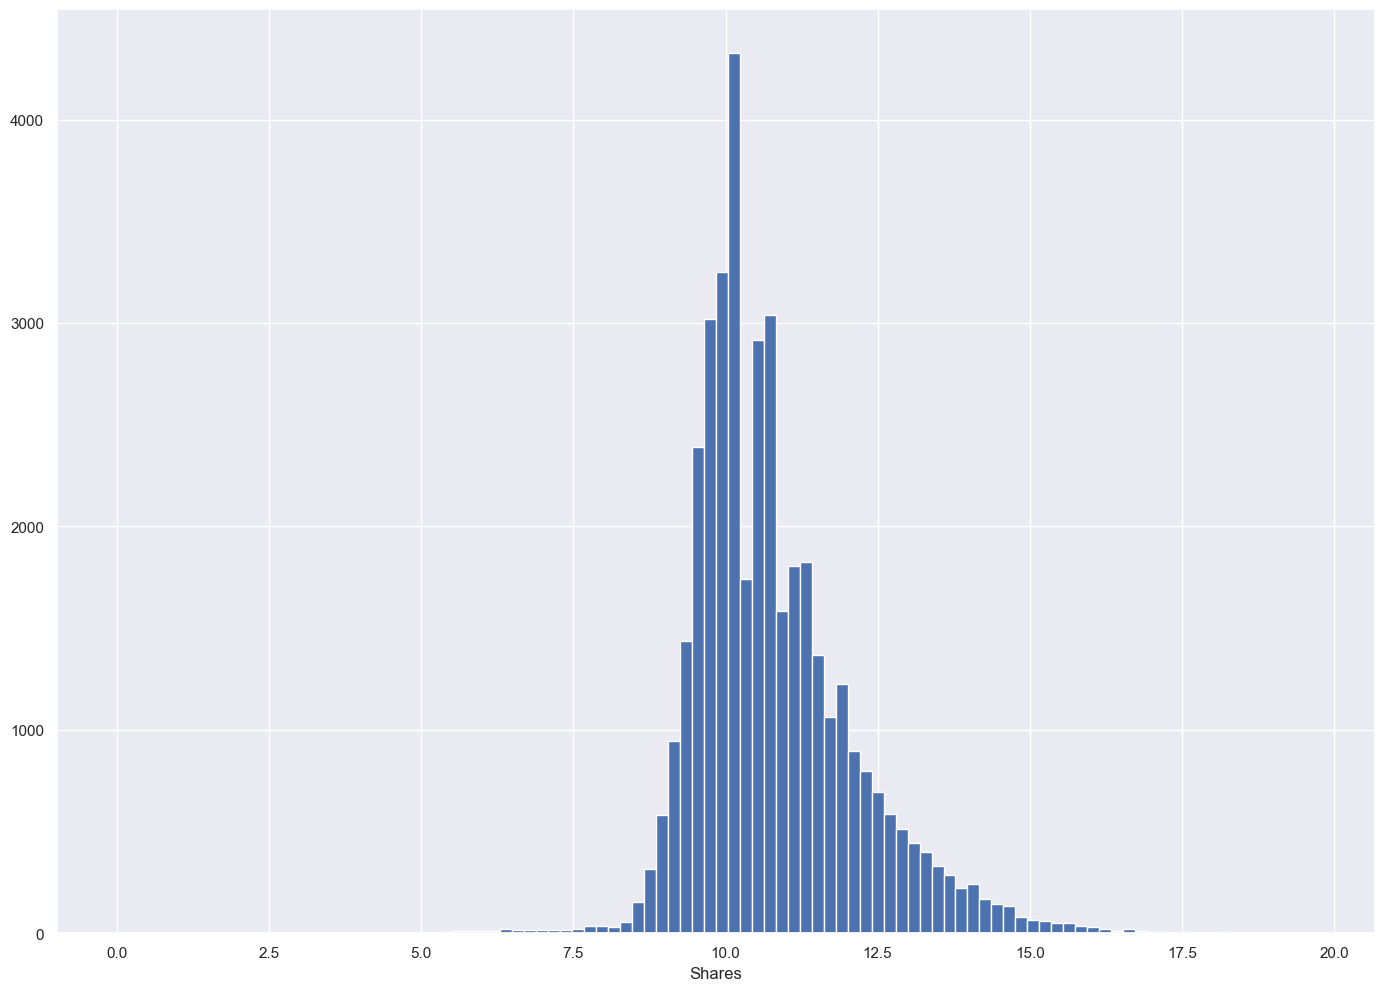

In [106]:
#Checking target value to see the distribution
plt.hist(np.log2(online_news_popularity_df['shares']),bins=100)                  
plt.xlabel('Shares')
plt.show()

In [107]:
online_news_popularity_df['shares'] = np.log2(online_news_popularity_df['shares'])

## Exploration Correlations

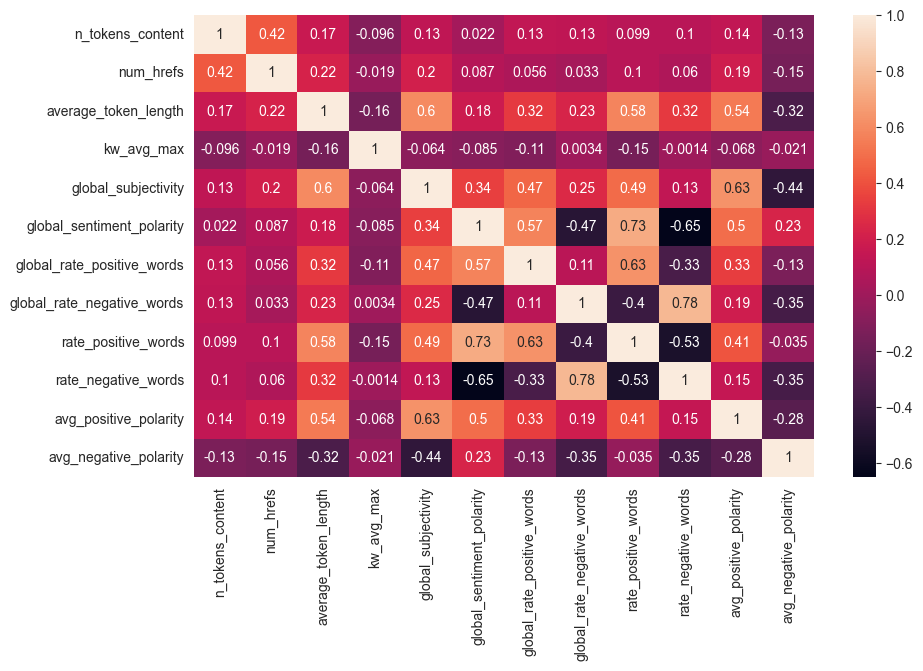

In [51]:
fig = plt.figure(figsize=(10,6))
sbn.heatmap(online_news_popularity_df[cols_names_numeric].corr(), annot=True)
plt.show()

Puntos a destacar, alta correlación entre:
   * n_tokens_content y num_hrefs
   * global_subjectivity y avg_positive_polarity
   * avg_positive_polarity y average_token_length
   * global_rate_positive_words y global_subjectivity

In [126]:
#Selecting columns to do the regression model
cols_binary_numeric = "data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,\
data_channel_is_tech,data_channel_is_world,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,\
weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday".split(',')

target = ['shares']

online_news_popularity_clean = online_news_popularity_df[cols_names_numeric + cols_binary_numeric + target]

In [128]:
online_news_popularity_clean.head()

,n_tokens_content,num_hrefs,average_token_length,kw_avg_max,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,...,data_channel_is_tech,data_channel_is_world,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,shares
0,219.0,4.0,4.680365,0.0,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,9.211888
1,255.0,3.0,4.913725,0.0,0.341246,0.148948,0.043137,0.015686,0.733333,0.266667,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,9.473706
2,211.0,3.0,4.393365,0.0,0.702222,0.323333,0.056872,0.009479,0.857143,0.142857,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,10.550747
3,531.0,9.0,4.404896,0.0,0.429850,0.100705,0.041431,0.020716,0.666667,0.333333,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,10.228819
4,1072.0,19.0,4.682836,0.0,0.513502,0.281003,0.074627,0.012127,0.860215,0.139785,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,8.980140


In [129]:
#Guardamos data set final
directory = r'./../data/processed'
file_path = os.path.join(directory, 'online_news_popularity_clean.csv')

os.makedirs(directory, exist_ok=True)

In [130]:
online_news_popularity_clean.to_csv(file_path, index=False)

## Feature Importance